In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# load dataset
df = pd.read_csv("who_suicide_statistics.csv")
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [7]:
df.shape

(43776, 6)

In [9]:
df.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [10]:
df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [11]:
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [12]:
df['suicides_no'].fillna(df['suicides_no'].median(), inplace=True)
df['population'].fillna(df['population'].median(), inplace=True)


C:\Users\khanu\AppData\Local\Temp\ipykernel_22168\3447323661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['suicides_no'].fillna(df['suicides_no'].median(), inplace=True)
C:\Users\khanu\AppData\Local\Temp\ipykernel_22168\3447323661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [14]:
df.isnull().sum().sum()

0

In [18]:
df.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,14.0,277900.0
1,Albania,1985,female,25-34 years,14.0,246800.0
2,Albania,1985,female,35-54 years,14.0,267500.0
3,Albania,1985,female,5-14 years,14.0,298300.0
4,Albania,1985,female,55-74 years,14.0,138700.0
5,Albania,1985,female,75+ years,14.0,34200.0
6,Albania,1985,male,15-24 years,14.0,301400.0
7,Albania,1985,male,25-34 years,14.0,264200.0
8,Albania,1985,male,35-54 years,14.0,296700.0
9,Albania,1985,male,5-14 years,14.0,325800.0


In [62]:
df['country'].nunique()

141

In [22]:
df['suicides_no'].nunique()

2231

In [55]:
# Calculate total population (sum of the population column)
total_population = df['population'].sum()

# Display the result
print(f'Total number of all living people: {total_population}')



Total number of all living people: 65839692243.0


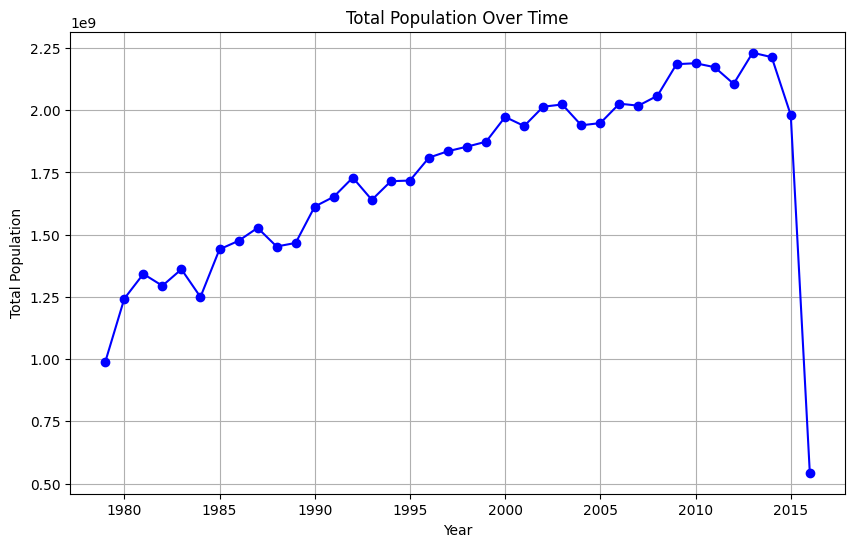

In [59]:
# Group by year and sum the population
population_by_year = df.groupby('year')['population'].sum()

# Plot the total population over time
plt.figure(figsize=(10, 6))
plt.plot(population_by_year.index, population_by_year.values, color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population Over Time')
plt.grid(True)
plt.show()



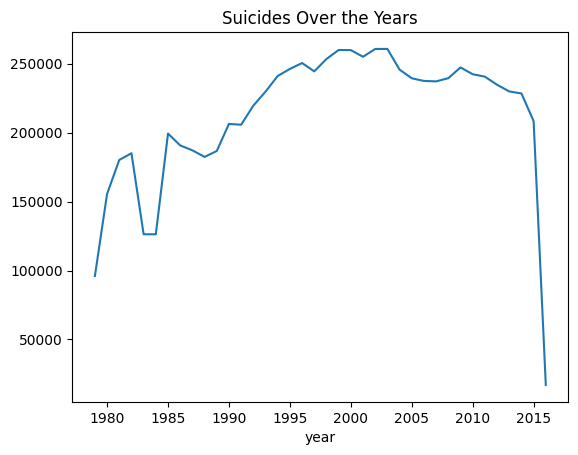

In [16]:
df.groupby('year')['suicides_no'].sum().plot(kind='line', title='Suicides Over the Years')
plt.show()


# The number of suicides appears to have increased steadily from 1980 to 2000.

In [17]:
df.columns.values

array(['country', 'year', 'sex', 'age', 'suicides_no', 'population'],
      dtype=object)

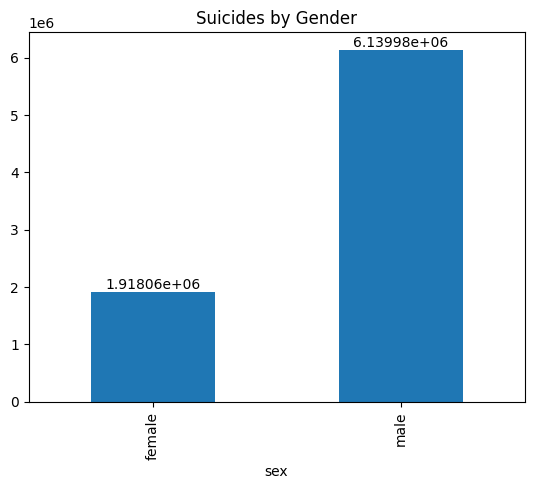

In [28]:
ax = df.groupby('sex')['suicides_no'].sum().plot(kind='bar', title='Suicides by Gender')
ax.bar_label(ax.containers[0])
plt.show()


## The chart clearly indicates that males have significantly higher suicide rates compared to females

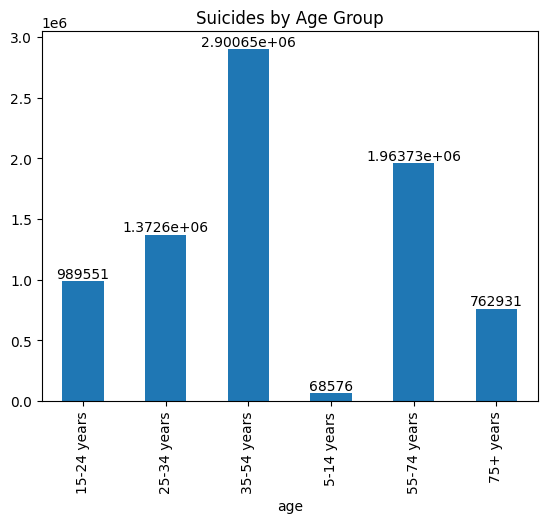

In [30]:
ax = df.groupby('age')['suicides_no'].sum().plot(kind='bar', title='Suicides by Age Group')
ax.bar_label(ax.containers[0])
plt.show()


## The 35-54 age group exhibits the highest number of suicides, significantly surpassing other age groups.

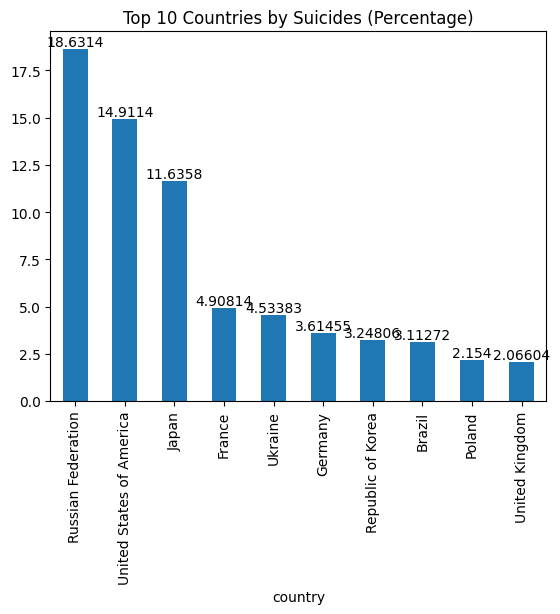

In [48]:
# Calculate the total number of suicides
total_suicides = df['suicides_no'].sum()

# Get the top 10 countries
top_countries = df.groupby('country')['suicides_no'].sum().nlargest(10)

# Calculate percentages for each country
percentages = (top_countries / total_suicides) * 100

# Create the bar chart with percentages as labels
ax = percentages.plot(kind='bar', title='Top 10 Countries by Suicides (Percentage)')
ax.bar_label(ax.containers[0])
plt.show()


### The Russian Federation accounts for the highest percentage of `18.6314` global suicides, significantly outpacing other countries.



In [37]:
df.groupby('sex')['suicides_no'].mean()  # Mean suicides by gender
df.groupby('age')['suicides_no'].mean()  # Mean suicides by age group


age
15-24 years    135.629249
25-34 years    188.130071
35-54 years    397.567434
5-14 years       9.399123
55-74 years    269.151864
75+ years      104.568394
Name: suicides_no, dtype: float64

# This distribution suggests that middle-aged adults `(35-54 years)` experience the `highest average suicide rates`, while younger children `(5-14 years)` have significantly `lower rates`.

In [38]:
df.groupby('year')[['suicides_no', 'population']].sum().corr()



,suicides_no,population
suicides_no,1.000000,0.884321
population,0.884321,1.000000


### The correlation analysis shows a strong positive correlation of **0.884** between the number of suicides and population size, indicating that higher populations tend to have more suicides. Both variables exhibit perfect self-correlation (**1.000**), confirming data integrity.

This strong relationship suggests the need for targeted public health strategies to address mental health in larger populations.

# Hypothesis Testing
T-test or ANOVA: Compare if the mean number of suicides is significantly different between genders, age groups, or countries. For example, you can test if there's a significant difference in suicide rates between males and females:

In [39]:
male_suicides = df[df['sex'] == 'male']['suicides_no'].dropna()
female_suicides = df[df['sex'] == 'female']['suicides_no'].dropna()

stats.ttest_ind(male_suicides, female_suicides)


TtestResult(statistic=26.046202549158664, pvalue=2.0186462327517488e-148, df=43774.0)

# we reject the null hypothesis, meaning there is a statistically significant difference in the suicide rates between males and females.

In [40]:
stats.f_oneway(
    df[df['age'] == '15-24 years']['suicides_no'].dropna(),
    df[df['age'] == '25-34 years']['suicides_no'].dropna(),
    df[df['age'] == '35-54 years']['suicides_no'].dropna()
)


F_onewayResult(statistic=155.2407469920699, pvalue=1.1312751162144102e-67)

# we reject the null hypothesis. This means there is a statistically significant difference in the suicide rates across the different age groups.

In [41]:
contingency_table = pd.crosstab(df['sex'], df['suicides_no'].notnull())
stats.chi2_contingency(contingency_table)


Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[21888.],
       [21888.]]))

# according to this test, the distribution of suicides is not dependent on gender.

In [42]:
from sklearn.linear_model import LinearRegression

X = df[['population', 'year']]
y = df['suicides_no']

model = LinearRegression()
model.fit(X, y)
print(model.coef_, model.intercept_)


[ 1.37760891e-04 -1.05114706e+00] 2077.6001220996195


# The linear regression analysis indicates that:

- **Population** has a very small positive effect on the number of suicides, with a negligible increase per additional person.
- **Year** shows a negative relationship, suggesting that the number of suicides decreases slightly over time, with approximately 1 fewer suicide per year.
  
The model suggests that while time has a noticeable impact on suicide rates, population size has a minimal influence.







In [44]:
df['suicide_rate_per_100k'] = (df['suicides_no'] / df['population']) * 100000
df

,country,year,sex,age,suicides_no,population,suicide_rate_per_100k
0,Albania,1985,female,15-24 years,14.0,277900.0,5.037783
1,Albania,1985,female,25-34 years,14.0,246800.0,5.672609
2,Albania,1985,female,35-54 years,14.0,267500.0,5.233645
3,Albania,1985,female,5-14 years,14.0,298300.0,4.693262
4,Albania,1985,female,55-74 years,14.0,138700.0,10.093727
...,...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,380655.0,39.405761
43772,Zimbabwe,1990,male,35-54 years,132.0,380655.0,34.677070
43773,Zimbabwe,1990,male,5-14 years,6.0,380655.0,1.576230
43774,Zimbabwe,1990,male,55-74 years,74.0,380655.0,19.440175


# The **`suicide_rate_per_100k`** was calculated to standardize suicide rates across populations. Key findings:

- Higher suicide rates are observed in smaller populations, especially among older age groups.
- For example, in **Albania (1985)**, the **55-74 age group** shows a rate of **10.09 per 100,000**, while the **15-24 age group** has a lower rate of **5.04 per 100,000** despite the same number of suicides.
- In **Zimbabwe (1990)**, the **25-34 male group** has a particularly high suicide rate of **39.41 per 100,000**.

This standardization helps identify high-risk groups for targeted intervention.